In [1]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import random
import time
import os


import torch.nn as nn
import torch.optim as optim

random_seed = 42
torch.backends.cudnn.deterministic = True
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

df = pd.read_csv("final_dataset.csv")
frequencies = ast.literal_eval(df["freqs[Hz]"].iloc[0])
lw_ref = ast.literal_eval(df["Lw_Ref"].iloc[0])
df

,test_num,manoeuvre_name,mic_num,time,freqs[Hz],Lws[dB],zeta[rad],velX[m/s],velY[m/s],velZ[m/s],...,X_e[m],Y_e[m],Z_e[m],delta_RPM1,delta_RPM2,delta_RPM3,delta_RPM4,delta_zeta,C_proc,Lw_Ref
0,1,Hover,mic_1,-271.852629,"[314.98026247371826, 333.7099635425086, 353.55...","[48.64300983673778, 65.01242522683135, 88.8740...",0.000000,-0.026100,-0.026255,-0.005617,...,-0.128846,0.115279,0.057122,3.030891,-28.381981,-37.371443,28.065980,0.000000,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140..."
1,2,Hover,mic_1,-271.151713,"[314.98026247371826, 333.7099635425086, 353.55...","[63.532159255691944, 70.69054519292442, 90.900...",0.000000,-0.007229,0.016168,0.003739,...,-0.136262,0.140734,0.054733,38.667255,-15.381981,-7.042772,21.877168,0.000000,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140..."
2,3,Hover,mic_1,-270.447328,"[314.98026247371826, 333.7099635425086, 353.55...","[55.654835278872135, 55.8704568386677, 95.2124...",0.000000,-0.002733,0.029885,0.007474,...,-0.142398,0.156720,0.053195,12.898024,3.387249,15.187998,-2.815139,0.000000,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140..."
3,4,Hover,mic_1,-269.756559,"[314.98026247371826, 333.7099635425086, 353.55...","[52.40809486964445, 65.3997799324605, 91.61007...",0.000000,0.001905,0.002591,0.001017,...,-0.144474,0.165996,0.055195,-10.332745,21.541096,35.726459,-13.892062,0.000000,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140..."
4,5,Hover,mic_1,-269.058603,"[314.98026247371826, 333.7099635425086, 353.55...","[50.379055588447784, 56.398399392972685, 89.26...",0.000000,-0.000719,-0.000661,0.004153,...,-0.145301,0.168780,0.057195,-18.975602,45.118019,44.407778,-53.375579,0.000000,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,101,Yaw,mic_7,7.074332,"[314.98026247371826, 333.7099635425086, 353.55...","[49.36627175522353, 57.403099198953086, 62.665...",1.574287,-0.084644,-0.087835,-0.009279,...,0.101489,0.303524,0.053062,-178.975602,105.760876,145.122063,-142.947007,1.574287,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140..."
206,102,Yaw,mic_7,7.779689,"[314.98026247371826, 333.7099635425086, 353.55...","[41.659347544774846, 45.31318835792328, 64.840...",1.574287,-0.045461,-0.125266,0.003394,...,-0.329547,-0.020753,0.050333,-182.696381,135.618019,179.901284,-186.934020,1.574287,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140..."
207,103,Yaw,mic_7,8.464689,"[314.98026247371826, 333.7099635425086, 353.55...","[49.88871911548689, 51.229446849895396, 61.292...",1.574287,0.052462,-0.095580,-0.005951,...,-0.278551,-0.506098,0.050711,-187.916078,99.784685,221.348254,-173.994626,1.574287,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140..."
208,104,Yaw,mic_7,9.160780,"[314.98026247371826, 333.7099635425086, 353.55...","[50.05031965634466, 47.73858390801173, 50.3631...",1.574287,0.091521,0.026020,0.002011,...,0.210728,-0.694200,0.047553,-177.878200,55.345291,173.719466,-130.934020,1.574287,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140..."


In [2]:
df_1 = df.drop(columns=["test_num",
                        "manoeuvre_name",
                        "mic_num",
                        "time",
                        "velX[m/s]",
                        "velY[m/s]",
                        "velZ[m/s]",
                        "X_e[m]",
                        "Y_e[m]",
                        "Z_e[m]",
                        "delta_RPM1",
                        "delta_RPM2",
                        "delta_RPM3",
                        "delta_RPM4",
                        "Lw_Ref",
                        "freqs[Hz]",
                        "zeta[rad]"], 
                        inplace=False)

df_1["RPM_Average"] = df_1[["RPM1", "RPM2", "RPM3", "RPM4"]].mean(axis=1)
df_1["pitch"] = abs((df_1["RPM1"] + df_1["RPM2"]) / 2 - (df_1["RPM3"] + df_1["RPM4"]) / 2) / df_1["RPM_Average"]
df_1["roll"] = abs((df_1["RPM1"] + df_1["RPM4"]) / 2 - (df_1["RPM3"] + df_1["RPM2"]) / 2) / df_1["RPM_Average"]
df_1["yaw"] = abs((df_1["RPM1"] + df_1["RPM3"]) / 2 - (df_1["RPM2"] + df_1["RPM4"]) / 2) / df_1["RPM_Average"]
df_1.rename(columns={"delta_zeta": "zeta", "Lws[dB]": "Lws"}, inplace=True)
lws_column = df_1.pop("Lws")
df_1["Lws"] = lws_column
df_1.to_csv("training_data.csv", index=False)

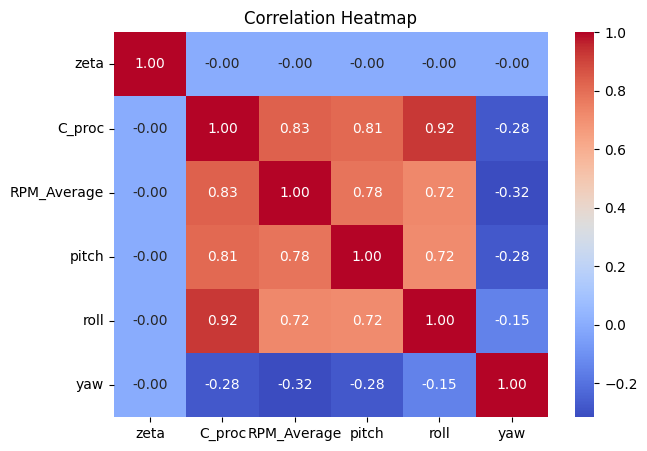

In [3]:
corr = df_1.drop(columns=["Lws","RPM1","RPM2","RPM3","RPM4"]).corr()
# Plot the heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
def calculate_loudness(SWL):
    SWL_rms = np.sqrt(np.mean(SWL**2))
    SWL_loudness_db = 20 * np.log10(SWL_rms)
    return SWL_loudness_db

In [5]:
class DNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 13)
        self.fc2 = nn.Linear(13, 40)
        self.fc3 = nn.Linear(40, output_dim)
    
    def forward(self, x):
        x = nn.LeakyReLU()(self.fc1(x))
        x = nn.LeakyReLU()(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def train_model(self, X_train, y_train, X_val, y_val, num_epochs, patience, lr=0.015, verbose=True):
        criterion = nn.L1Loss()
        optimizer = optim.Adam(self.parameters(), lr=lr)
        best_val_loss = float('inf')
        patience_counter = 0
        earlystopped = False
        train_losses = []
        val_losses = []
        best_epoch = 0
        
        start_time = time.time()
        
        for epoch in range(num_epochs):
            self.train()
            optimizer.zero_grad()
            outputs = self(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            
            self.eval()
            with torch.no_grad():
                val_outputs = self(X_val)
                val_loss = criterion(val_outputs, y_val)
            
            train_losses.append(loss.item())
            val_losses.append(val_loss.item())
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                best_model = self.state_dict()
                best_epoch = epoch + 1
            else:
                patience_counter += 1
            
            if patience_counter >= patience:
                earlystopped = True
                break
            
            if verbose and (epoch+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}', end='\r')
        if verbose: print()
        if earlystopped and verbose: print(f'Early stopping at epoch {epoch+1} with best epoch: {best_epoch}')
        end_time = time.time()
        total_training_time = end_time - start_time
        print(f'Training completed in {total_training_time:.2f} seconds | Best epoch: {best_epoch} | Best val loss: {best_val_loss:.4f}')
        self.load_state_dict(best_model)
        return train_losses, val_losses, best_epoch, total_training_time

In [6]:
num_iterations = 1

avg_train_losses = []
avg_val_losses = []
avg_training_times = []
avg_mape = []
avg_rmse = []
avg_mae = []
best_model = None
best_mae = float('inf')

for seed in range(num_iterations):
    it = seed
    print(f'[{it}/{num_iterations}] ', end='')
    # Split the data into features and target
    X = df_1[['zeta', 'C_proc', 'RPM_Average', 'pitch', 'roll', 'yaw']].values
    y = np.array([ast.literal_eval(lws) for lws in df_1['Lws']])

    # Standardize the features using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(1, 2))
    X = scaler.fit_transform(X)

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

    # Convert data to PyTorch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)

    # Define the model
    input_dim = X_train.shape[1]
    output_dim = y_train.shape[1]
    model = DNN(input_dim, output_dim)

    # Train the model
    train_losses, val_losses, best_epoch, total_training_time = model.train_model(X_train, y_train, X_val, y_val, num_epochs=50000, patience=5000, verbose=False)

    avg_train_losses.append(train_losses)
    avg_val_losses.append(val_losses)
    avg_training_times.append(total_training_time)

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        actual_Lw_total = y_test.numpy().mean(axis=1)
        predicted_Lw_total = y_pred.numpy().mean(axis=1)
        mape = np.mean(np.abs((actual_Lw_total - predicted_Lw_total)) / actual_Lw_total) * 100
        rmse = np.sqrt(np.mean((actual_Lw_total - predicted_Lw_total) ** 2))
        mae = np.mean(np.abs(actual_Lw_total - predicted_Lw_total))
        avg_mape.append(mape)
        avg_rmse.append(rmse)
        avg_mae.append(mae)
        if mae < best_mae:
            best_mae = mae
            best_model = model

# Calculate the average train and validation losses, average training time, and average error metrics
avg_train_loss = np.mean([loss[-1] for loss in avg_train_losses])
avg_val_loss = np.mean([loss[-1] for loss in avg_val_losses])
avg_training_time = np.mean(avg_training_times)
avg_mape_value = np.mean(avg_mape)
avg_rmse_value = np.mean(avg_rmse)
avg_mae_value = np.mean(avg_mae)

model = best_model


[0/1] Training completed in 31.26 seconds | Best epoch: 10689 | Best val loss: 3.9624


In [7]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

147
31
32


In [8]:
box_width = 50
print("+" + "-" * (box_width - 2) + "--+")
print(f"|{'Average Training Loss:':<25}{avg_train_loss:>22.4f}   |")
print(f"|{'Average Validation Loss:':<25}{avg_val_loss:>22.4f}   |")
print(f"|{'Average Training Time:':<25}{avg_training_time:>22.2f} s |")
print(f"|{'Average MAPE:':<25}{avg_mape_value:>22.2f} % |")
print(f"|{'Average RMSE:':<25}{avg_rmse_value:>22.3f}   |")
print(f"|{'Average MAE:':<25}{avg_mae_value:>22.3f}   |")
print("+" + "-" * (box_width - 2) + "--+")

output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

result_data = {
    "avg_train_loss": [avg_train_loss],
    "avg_val_loss": [avg_val_loss],
    "avg_training_time": [avg_training_time],
    "avg_mape": [avg_mape_value],
    "avg_rmse": [avg_rmse_value],
    "avg_mae": [avg_mae_value]
}

result_data = pd.DataFrame(result_data)
result_data.to_csv(f"{output_dir}/kfold_dnn_results.csv", index=False)
print("Results saved to 'output/kfold_dnn_results.csv'")

# Save the model
torch.save(model.state_dict(), os.path.join(output_dir, 'model.pth'))
print(f"Model saved to 'output/model.pth'")

+--------------------------------------------------+
|Average Training Loss:                   3.3426   |
|Average Validation Loss:                 4.0584   |
|Average Training Time:                    31.26 s |
|Average MAPE:                              3.53 % |
|Average RMSE:                             2.597   |
|Average MAE:                              2.009   |
+--------------------------------------------------+
Results saved to 'output/kfold_dnn_results.csv'
Model saved to 'output/model.pth'


,MAPE,RMSE,MAE,Best Epoch,Total Training Time [s],Best Validation Loss (MAE)
0,3.53 %,2.597,2.009,10689,31.26,3.9624


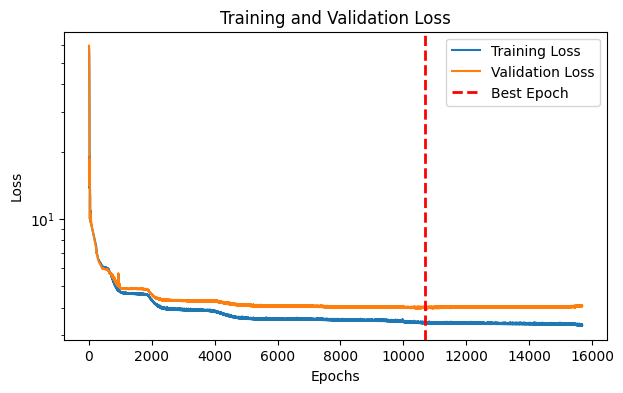

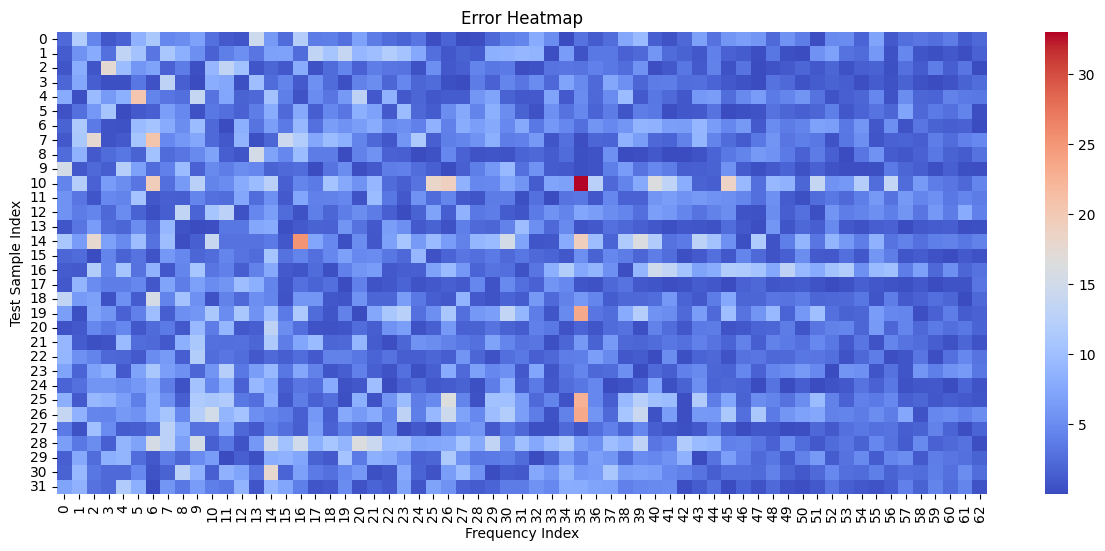

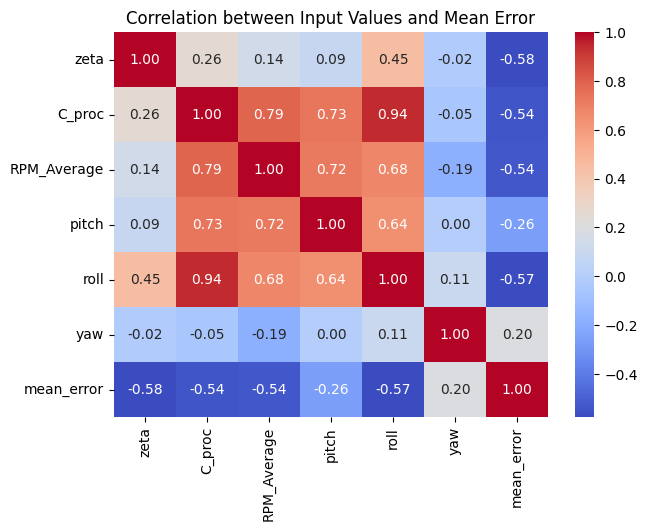

In [9]:
model.eval()
print()
with torch.no_grad():
    y_pred = model(X_test)
    actual_Lw_total = y_test.numpy().mean(axis=1)
    predicted_Lw_total = y_pred.numpy().mean(axis=1)
    mape = np.mean(np.abs((actual_Lw_total - predicted_Lw_total)) / actual_Lw_total) * 100
    rmse = np.sqrt(np.mean((actual_Lw_total - predicted_Lw_total) ** 2))
    mae = np.mean(np.abs(actual_Lw_total - predicted_Lw_total))
    # Save the error values to a CSV file
    error_values = {
        'MAPE': [f"{mape:.2f} %"],
        'RMSE': [f"{rmse:.3f}"],
        'MAE': [f"{mae:.3f}"],
        'Best Epoch': [best_epoch],
        'Total Training Time [s]': [f"{total_training_time:.2f}"],
        'Best Validation Loss (MAE)': [f"{val_losses[best_epoch-1]:.4f}"],
    }
    error_df = pd.DataFrame(error_values)
    error_df.to_csv(os.path.join(output_dir, 'error_values.csv'), index=False)
    display(error_df)

    # Plot the training and validation loss
    plt.figure(figsize=(7, 4))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.axvline(best_epoch, color='red', linestyle='--', linewidth=2, label='Best Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.savefig(os.path.join(output_dir, 'loss_plot.png'))
    plt.show()
    
    # Visualize the error in a heatmap
    error_matrix = np.abs(y_test.numpy() - y_pred.numpy())
    plt.figure(figsize=(15, 6))
    sns.heatmap(error_matrix, annot=False, cmap='coolwarm', cbar=True)
    plt.title('Error Heatmap')
    plt.xlabel('Frequency Index')
    plt.ylabel('Test Sample Index')
    plt.savefig(os.path.join(output_dir, 'error_heatmap.png'))
    plt.show()
    
    # Calculate the mean error for each test sample
    mean_errors = error_matrix.mean(axis=1)

    # Create a DataFrame to correlate the errors with the input values
    error_df = pd.DataFrame(X_test.numpy(), columns=['zeta', 'C_proc', 'RPM_Average', 'pitch', 'roll', 'yaw'])
    error_df['mean_error'] = mean_errors

    # Calculate the correlation matrix
    error_corr = error_df.corr()

    # Plot the heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(error_corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation between Input Values and Mean Error')
    plt.savefig(os.path.join(output_dir, 'correlation_heatmap.png'))
    plt.show()

In [10]:
example_idx = 7

SWL_predicted = y_pred[example_idx]
SWL_real = y_test[example_idx]

# plt.figure(figsize=(10, 6))
# plt.semilogx(frequencies, SWL_predicted, marker='o', linestyle='-', label='SWL Predicted')
# plt.semilogx(frequencies, SWL_real, marker='o', linestyle='-', label='SWL Real')
# plt.grid(True, which="both", linestyle='--', linewidth=0.5)
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Sound Pressure Level (dB)')
# plt.title('SWL vs Frequency (1/12 Octave Bands)')
# plt.legend()
# plt.show()

# # Calculate the loudness for the predicted and real SWL
# SWL_predicted_loudness_db = calculate_loudness(SWL_predicted.numpy().mean())
# SWL_real_loudness_db = calculate_loudness(SWL_real.numpy().mean())

# print(f"SWL Predicted Mean Loudness: {SWL_predicted_loudness_db:.2f} dB")
# print(f"SWL Real Mean Loudness: {SWL_real_loudness_db:.2f} dB")

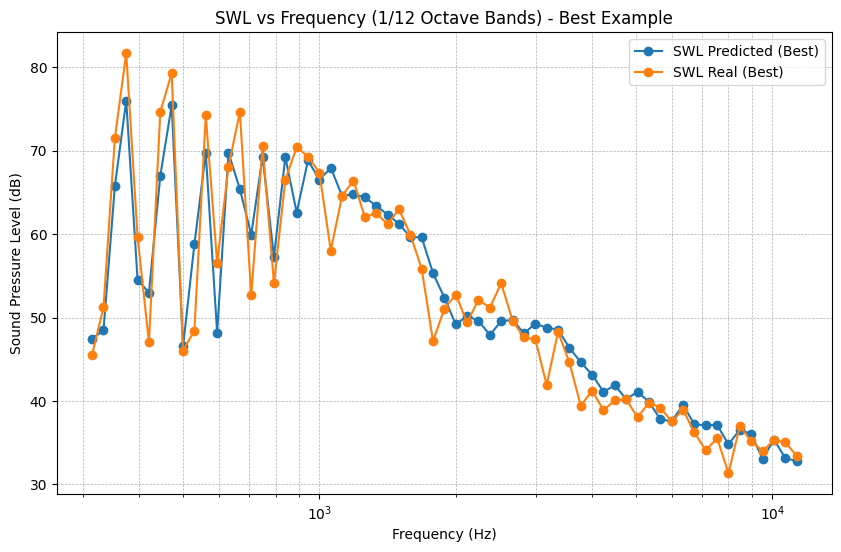

SWL Predicted Mean Loudness: 34.31 dB
SWL Real Mean Loudness: 34.28 dB
Best Example Input:
RPM1                                                 2872.083333
RPM2                                                      2658.0
RPM3                                                 2541.083333
RPM4                                                 2787.416667
zeta                                                    0.321141
C_proc                                                       0.0
RPM_Average                                          2714.645833
pitch                                                   0.037129
roll                                                    0.084802
yaw                                                      0.00594
Lws            [53.02756540706639, 66.2789254965796, 85.06517...
Name: 24, dtype: object


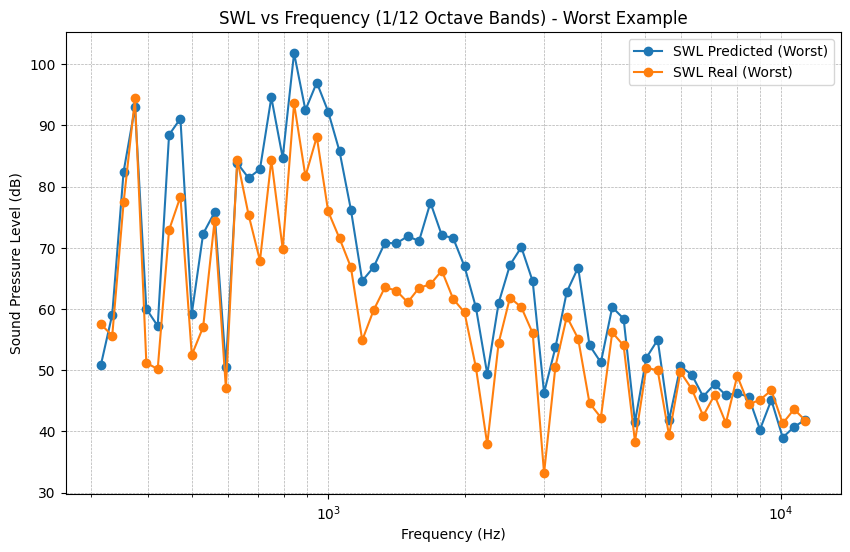

SWL Predicted Mean Loudness: 36.21 dB
SWL Real Mean Loudness: 35.32 dB

Worst Example Input:
RPM1                                                 2937.615385
RPM2                                                 2619.769231
RPM3                                                 2525.923077
RPM4                                                 2810.769231
zeta                                                    0.321141
C_proc                                                       0.0
RPM_Average                                          2723.519231
pitch                                                   0.040516
roll                                                    0.110646
yaw                                                     0.006058
Lws            [62.196527632097116, 64.57309275631728, 88.495...
Name: 28, dtype: object


In [11]:
# Calculate the errors for each example in the test set
errors = np.abs((actual_Lw_total - predicted_Lw_total)) / actual_Lw_total

# Find the indices of the best and worst examples
best_example_idx = np.argmin(errors)
worst_example_idx = np.argmax(errors)

# Plot the best example
SWL_predicted_best = y_pred[best_example_idx]
SWL_real_best = y_test[best_example_idx]

plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, SWL_predicted_best, marker='o', linestyle='-', label='SWL Predicted (Best)')
plt.semilogx(frequencies, SWL_real_best, marker='o', linestyle='-', label='SWL Real (Best)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Sound Pressure Level (dB)')
plt.title('SWL vs Frequency (1/12 Octave Bands) - Best Example')
plt.legend()
plt.savefig(os.path.join(output_dir, 'best_example_plot.png'))
plt.show()


# Calculate the loudness for the predicted and real SWL
SWL_predicted_loudness_db = calculate_loudness(SWL_predicted_best.numpy().mean())
SWL_real_loudness_db = calculate_loudness(SWL_real_best.numpy().mean())

print(f"SWL Predicted Mean Loudness: {SWL_predicted_loudness_db:.2f} dB")
print(f"SWL Real Mean Loudness: {SWL_real_loudness_db:.2f} dB")

# Print the input information of the best example
print("Best Example Input:")
print(df_1.iloc[best_example_idx])

# Plot the worst example
SWL_predicted_worst = y_pred[worst_example_idx]
SWL_real_worst = y_test[worst_example_idx]

plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, SWL_predicted_worst, marker='o', linestyle='-', label='SWL Predicted (Worst)')
plt.semilogx(frequencies, SWL_real_worst, marker='o', linestyle='-', label='SWL Real (Worst)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Sound Pressure Level (dB)')
plt.title('SWL vs Frequency (1/12 Octave Bands) - Worst Example')
plt.legend()
plt.savefig(os.path.join(output_dir, 'worst_example_plot.png'))
plt.show()

# Calculate the loudness for the predicted and real SWL
SWL_predicted_loudness_db = calculate_loudness(SWL_predicted_worst.numpy().mean())
SWL_real_loudness_db = calculate_loudness(SWL_real_worst.numpy().mean())

print(f"SWL Predicted Mean Loudness: {SWL_predicted_loudness_db:.2f} dB")
print(f"SWL Real Mean Loudness: {SWL_real_loudness_db:.2f} dB")

# Print the input information of the worst example
print("\nWorst Example Input:")
print(df_1.iloc[worst_example_idx])